<a href="https://colab.research.google.com/github/tavissiva/Image-classification-with-cnn-using-keras-cifar10/blob/master/ImageClassifictioinWithCNNUsingKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification With CNN Using Keras

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


[Cifar10 Details](https://https://www.cs.toronto.edu/~kriz/cifar.html)

[Cifar10 Keras Implementation](https://keras.io/examples/cifar10_cnn/)




#1.Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

if not os.path.isdir('models'):
  os.mkdir('models')


print("tf version: ", tf.__version__)
print("Is Using GPU? ",tf.test.is_gpu_available())

tf version:  2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is Using GPU?  True


#2. Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

def dataset_shape(train=True, test=True):
  if train:
    print("Training sets (no_of_images_samples, height, width, color_channel )  :  ", X_train.shape)
    print("Training classes (output_classes_for_no_of_image, 1)   :  ", y_train.shape)
  if test:
    print("Test sets (no_of_images_samples, height, width, color_channel )    :  ", X_test.shape)
    print("Test classes (output_classes_for_no_image, 1)   :  ", y_test.shape)
  print()

dataset_shape()


170500096/170498071 [==============================] - 4s 0us/step
Training sets (no_of_images_samples, height, width, color_channel )  :   (50000, 32, 32, 3)
Training classes (output_classes_for_no_of_image, 1)   :   (50000, 1)
Test sets (no_of_images_samples, height, width, color_channel )    :   (10000, 32, 32, 3)
Test classes (output_classes_for_no_image, 1)   :   (10000, 1)



#3. Preprocess Data

In [0]:
"""
Choose how many classes you needed to train your model. 
If you want to try all classes skip 'get_classes' method

"""
#Here I am using particular classes to reduce the computation time 
def get_classes(X, y, choice_classes=list(range(10))): 
  #Cifar10 dataset classes indices start from zero
  if len(choice_classes) != 10:
    indices = []
    for classes in choice_classes:
      index, _ = np.where(y == float(classes))
      indices.append( index )
    index_classes = np.concatenate(indices, axis = 0)  #indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

    X = X[index_classes]
    y = y[index_classes]


  #shuffling the dataset sample
  no_sample = X.shape[0]
  shuffled_index = np.random.choice(range(no_sample), no_sample, replace=False)
  X = X[shuffled_index]
  y = y[shuffled_index]

  """
  preprocess the predicton y samples to fit for classification
  Example :
    Before : y => [1] or y=> [0]
    After : y => [0, 0, 1] or y=>[0, 0, 0] #Here depth is no of classes choosen.
  """
  y = tf.keras.utils.to_categorical(y)

  return X, y


**Shuffle Samples**

In [4]:
#cifar10 classes
cifar10_all_classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# choose what particular classes you want to try
choice_classes = [0,1,2]
cifar10_classes = [ cifar10_all_classes[i] for i in choice_classes]
X_train , y_train = get_classes(X_train, y_train, choice_classes)
X_test, y_test = get_classes(X_test, y_test, choice_classes)

#check the shape of datasets
dataset_shape()

Training sets (no_of_images_samples, height, width, color_channel )  :   (15000, 32, 32, 3)
Training classes (output_classes_for_no_of_image, 1)   :   (15000, 3)
Test sets (no_of_images_samples, height, width, color_channel )    :   (3000, 32, 32, 3)
Test classes (output_classes_for_no_image, 1)   :   (3000, 3)



#4. Visualize Samples

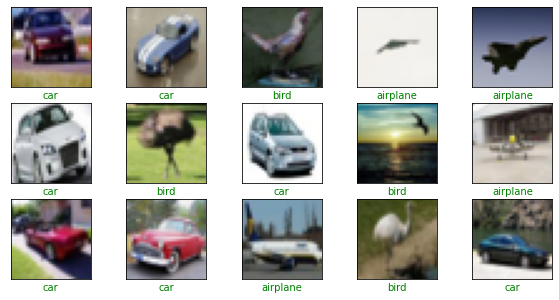

In [27]:
def show_random_samples(x, y, predicts, samples=10):
  indices = np.random.choice(range(x.shape[0]), samples, replace=False)

  x = x[indices]
  y = y[indices]
  predicts = predicts[indices]

  plt.figure(figsize=(10, 5))
  for i in range(samples):
    plt.subplot(3, 5, i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    clr = 'green' if np.argmax(y[i]) == np.argmax(predicts[i]) else 'red'
    plt.xlabel(cifar10_classes[np.argmax(predicts[i])], color=clr)
  plt.show()

# y_train value is given as a predict value because we haven't been train the model
show_random_samples(X_train, y_train, y_train, samples=15)


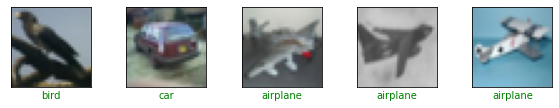

In [6]:
show_random_samples(X_test, y_test, y_test, samples=5)

#5. Create Model

[Activation function](https://en.wikipedia.org/wiki/Activation_function)

Non-Linear activation function:

*   [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
*   [tanh](https://en.wikipedia.org/wiki/Hyperbolic_functions)
*   [relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) Usually relu activation performs well in the most of the case.
*    softmax

[Softmax axtivation function](https://en.wikipedia.org/wiki/Softmax_function) : used for classification problem which gives probability of all output value, which sum gives one.

In [0]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Input, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [8]:
def create_model():

  model = Sequential()
  #For first layer we need to specify a input shape, note that input_shape matches to sample sets shape
  model.add(Input(shape=(32, 32, 3)))
  model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same')) 
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=3,activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.5))

  model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.5))

  model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(512, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.5))


  model.add(Flatten())
  # Softmasx Activation is used for classification
  model.add(Dense(200, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 128)       5

#6. Train Model

In [9]:
model = model.fit(
    X_train/255., y_train,
    validation_data = (X_test/255., y_test),
    epochs = 40, batch_size = 128,
    callbacks=[
              EarlyStopping(monitor='val_accuracy', patience=5),
              ModelCheckpoint("models/model_{val_accuracy:.3f}.h5",
                              monitor='val_accuracy', 
                              save_best_only=True,
                              save_weights_only = False) 
    ]
)
#earlystopping is used to monitor the parameter with patience, it stops execution after it reache patience limit, "try different patients parameter"
#Model checkpoint save the best model respect to the monitor parameter

Epoch 1/40
118/118 [==============================] - 3s 26ms/step - loss: 0.7267 - accuracy: 0.7216 - val_loss: 2.6444 - val_accuracy: 0.3333
Epoch 2/40
118/118 [==============================] - 3s 23ms/step - loss: 0.4459 - accuracy: 0.8230 - val_loss: 1.9282 - val_accuracy: 0.4330
Epoch 3/40
118/118 [==============================] - 3s 21ms/step - loss: 0.3688 - accuracy: 0.8577 - val_loss: 1.4407 - val_accuracy: 0.4153
Epoch 4/40
118/118 [==============================] - 3s 22ms/step - loss: 0.3233 - accuracy: 0.8771 - val_loss: 1.0296 - val_accuracy: 0.6120
Epoch 5/40
118/118 [==============================] - 3s 22ms/step - loss: 0.2778 - accuracy: 0.8934 - val_loss: 1.3869 - val_accuracy: 0.5793
Epoch 6/40
118/118 [==============================] - 3s 23ms/step - loss: 0.2491 - accuracy: 0.9040 - val_loss: 0.2977 - val_accuracy: 0.8813
Epoch 7/40
118/118 [==============================] - 3s 23ms/step - loss: 0.2245 - accuracy: 0.9151 - val_loss: 0.2092 - val_accuracy: 0.9210

#7. Prediction

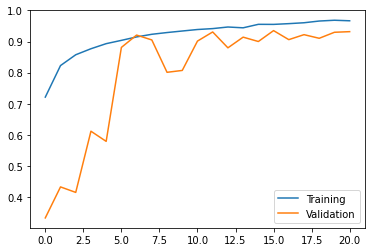

In [10]:
accuracy = model.history['accuracy']
val_accuracy = model.history['val_accuracy']

plt.plot(range(len(accuracy)), accuracy, label='Training')
plt.plot(range(len(val_accuracy)), val_accuracy, label='Validation')
plt.legend()
plt.show()

In [0]:
model = tf.keras.models.load_model('models/model_0.935.h5')

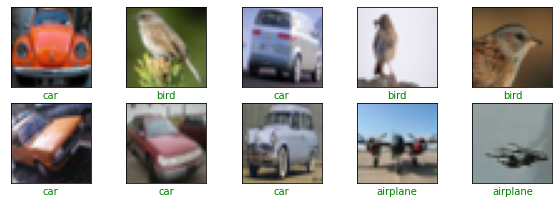

In [35]:
preds = model.predict(X_test/255.)
show_random_samples(X_test/255., y_test, preds, samples=10)
#predicts some image wrongly, tune the model to get higher accuracy